In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')
sys.path.append('C://Users//DavidB//PycharmProjects//My_Football_Analytics//Position_data')

import pandas as pd
import numpy as np
import Data.Metrica_IO as mio
from Tracking_Data import tracking_data
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import PitchControl.pitch_control as pc
from Data.DFL_data import parse_dfl_pos_data

In [2]:
data_dir = 'sample-data-master/data/'
game_id = 2
away = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Away')
home = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Home')
td = mio.merge_tracking_data(home, away)
td_object = tracking_data(td, data_source='metrica', scale_to_pitch='mplsoccer')
print(td_object)
td_object.get_velocities()
td_object.data.head()

Reading team: away
Reading team: home
tracking_data object of metrica of shape (141156, 56).


,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,113.13,40.3304,77.7744,22.884,81.3024,34.2424,83.8584,44.4848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,113.13,40.3304,77.7744,22.884,81.3024,34.2424,83.8584,44.4848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,113.13,40.3304,77.7744,22.884,81.3024,34.2424,83.8584,44.4848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,113.13,40.3304,77.7744,22.884,81.3024,34.2424,83.8584,44.4848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,113.13,40.3304,77.7744,22.884,81.3024,34.2424,83.8584,44.4848,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
td_object.Home_GK, td_object.Away_GK 

('11', '25')

In [4]:
attacking_players = pc.get_all_players(td_object=td_object, frame=1, teams=['Home'])
attacking_players

In [5]:
defending_players = pc.get_all_players(td_object=td_object, frame=1, teams=['Away'])
defending_players

In [13]:
pc.check_offside(td_object, frame = 1, attacking_team='Home', verbose=True)

player 5 in Home_5 team is offside


(<Figure size 640x480 with 1 Axes>, <Axes: >)

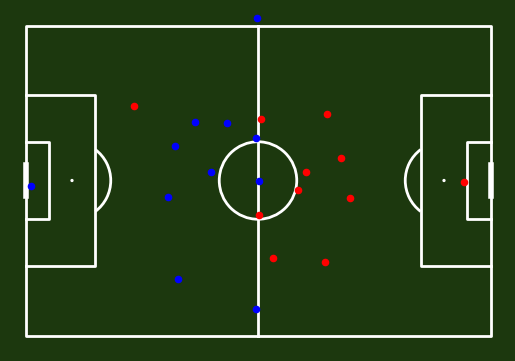

In [14]:
td_object.plot_players(frame=1, velocities=True)